# Defining the target Wo type function
Let calculate the derivate expression of the family of functions we want to play with. 




In [97]:
#Importing all stuff

from sympy import *

#//////////////   Lets define here the expression of Wo we want to calculate the fold state.  /////////////


t = Symbol('t') #Defining the symbol t

Wo = exp(sin(t)) #Plug here your expression. Lets derivate it with sympy in case its get complex. 
    # IMPORTANT. Plug it in sympy notation so there is no chance to mistake. Later on we will re write it in np. 
    
dWo = diff(Wo) #Now, let derive the expression and print the result so we can manually :( translate into np. 
print(dWo)
    

exp(sin(t))*cos(t)


Now, as it was explained in the theory, the differential equation in which we have to implement this expression is the following: 


$$\frac{\partial z}{\partial t}=  \sqrt{1-tan(\gamma )^{2}\left ( \frac{\partial W_{0} }{\partial t} \right )^{2}} $$

We will implement a function dzdt in python in which we will implement the previous expression in the $\frac{\partial z}{\partial t}$

<IPython.core.display.Javascript object>


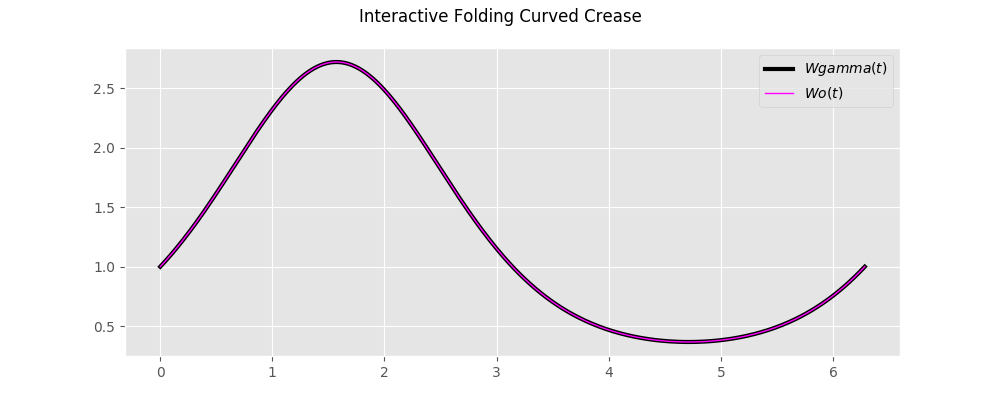

interactive(children=(IntSlider(value=400, description='n:', max=600, min=1), FloatSlider(value=0.0, descripti…

In [98]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style


import numpy as np

%matplotlib nbagg
style.use('ggplot')

fig, ax = plt.subplots(1, figsize=(10, 4))
plt.ylim(-1.8,1.8)
plt.suptitle('Interactive Folding Curved Crease')



def Wo(t):
    return np.exp(np.sin(t))
def dWodt(t):
    return np.cos(t)*np.exp(np.sin(t))





def dzdt(t, y, Gamma):
    '''
    Here the function dz/dt is written. We are asking later in the euler integration the slope of the
    z(t) function at different x values.
    
    '''
    fold_ang = Gamma/180 * np.pi # Degrees
    return np.sqrt(1-(np.tan(fold_ang)**2)*((dWodt(t))**2))

def euler(n, Gamma):
    ax.clear()
    fold_ang = Gamma/180 * np.pi # Degrees
    x0 = 0 #Initial Conditions. Mandatory to solve the ODE
    y0 = 0 #Initial Conditions. Mandatory to solve the ODE
    xf = 2*np.pi #Limit of the calculation. Any value furder than 2pi will be a repetition. 
    h = (xf-x0)/n #Tiny steps definition
    x = [x0] #Array of the discrete estimated x values
    y = [y0] #Array of the discrete estimated y values

    for i in range(n):
        y0 = y0 + h * dzdt(x0,y0, Gamma)
        x0 = x0 + h
        x.append(x0)
        y.append(y0)
        
    z = []
    for i in x:
        z.append(Wo(i)/np.cos(fold_ang))
        
    ax.plot(y,z, color = 'black',linewidth = 3, label = '$Wgamma(t)$')
    ax.plot(x, Wo(x), color = 'magenta', linewidth = 1 ,label = '$Wo(t)$')
    plt.legend()
    plt.show()
    return x, y, z



n = widgets.IntSlider(min=1, max=600, value=400, description='n:')
Gamma = widgets.FloatSlider(min=0, max=45, value=0, description='Folding Angle:')
    
widgets.interactive(euler, n=n, Gamma=Gamma)

<IPython.core.display.Javascript object>


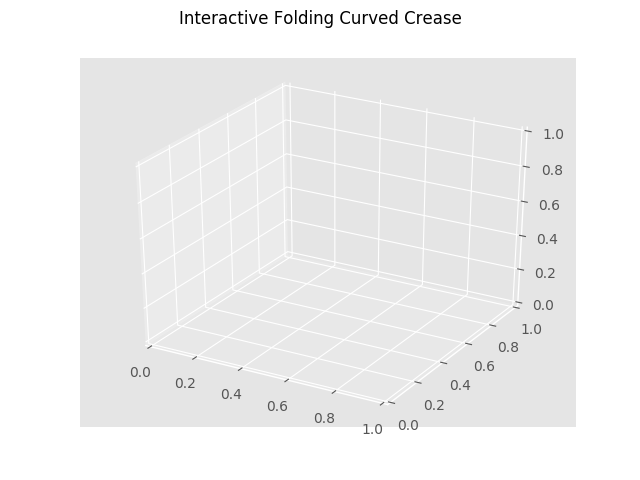

interactive(children=(IntSlider(value=50, description='n:', max=600, min=1), FloatSlider(value=0.0, descriptio…

In [93]:


import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 



import numpy as np

%matplotlib nbagg
style.use('ggplot')

fig = plt.figure()


ax = fig.add_subplot( projection='3d')
plt.suptitle('Interactive Folding Curved Crease')


def Wo(x):
    return np.cos(x)*np.sin(x)*x
def dWodt(x):
    return x*np.cos(2*x) + np.sin(x)*np.cos(x)

    '''
 def Wo(t): 
     return np.sin(t)
def dWodt(t):
    return np.cos(t)
    '''






def dzdt(t, y, Gamma):
    '''
    Here the function dz/dt is written. We are asking later in the euler integration the slope of the
    z(t) function at different x values.
    
    '''
    fold_ang = Gamma/180 * np.pi # Degrees
    return np.sqrt(1-(np.tan(fold_ang)**2)*((dWodt(t))**2))




def euler(n, Gamma, length, steps):
    ax.clear()
    fold_ang = Gamma/180 * np.pi # Degrees
    x0 = 0 #Initial Conditions. Mandatory to solve the ODE
    y0 = 0 #Initial Conditions. Mandatory to solve the ODE
    xf = 2*np.pi #Limit of the calculation. Any value furder than 2pi will be a repetition. 
    h = (xf-x0)/n #Tiny steps definition
    x = [x0] #Array of the discrete estimated x values
    y = [y0] #Array of the discrete estimated y values

    for i in range(n):
        y0 = y0 + h * dzdt(x0,y0, Gamma)
        x0 = x0 + h
        x.append(x0)
        y.append(y0)
        
    z = []
    for i in x:
        z.append(Wo(t)/np.cos(fold_ang))
    
    h = []
    for i in y:
        h.append(0)
    print(len(h))
    print(len(z))
    print(range(n+1))
    
    mesh_h = length / steps
    for stp in range(steps):
        for i in range(n+1):
            y.append(y[i])
            z.append(z[i]-stp*mesh_h*np.cos(fold_ang))
            h.append((-stp)*np.sin(fold_ang))
    
    #Ahora tengo todos los vectores con los mismos valores. 
    
    #y,z,h = np.meshgrid(y, z,h)
    ax.scatter(y,z,h ,color = 'black',linewidth = 1, label = '$Wgamma(t)$')
    ax.plot(x, Wo(x), color = 'magenta', linewidth = 1 ,label = '$Wo(t)$')
    ax.plot_trisurf(y, z, h, vmax =0.1, shade = True, color = 'pink', alpha = 0.5)
    ax.set_xlim(0,6.3)
    ax.set_ylim(-10,0) 
    ax.set_zlim(0,-6) 

    
    
    plt.legend()
    plt.show()
    return x, y, z



length= widgets.FloatSlider(min=0, max=45, value=10, description='Side Length:')
steps = widgets.IntSlider(min=1, max=10, value=5, description='Mesh def:')
n = widgets.IntSlider(min=1, max=600, value=50, description='n:')
Gamma = widgets.FloatSlider(min=0, max=45, value=0, description='Fold it:')
    
widgets.interactive(euler, n=n, Gamma=Gamma, length = length, steps = steps)